In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class LinearRegression:
    #Linear Regression using closed form solution
    def train(self, X, y):
        #normalise data
        self.x_min = np.amin(X)
        self.x_scale = np.amax(X) - self.x_min
        if (self.x_scale <= 0): self.x_scale = 1
        X = (X - self.x_min) / self.x_scale

        self.y_min = np.amin(y)
        self.y_scale = np.amax(y) - self.y_min
        if (self.y_scale <= 0): self.y_scale = 1
        y = (y - self.y_min) / self.y_scale

        #Add bias term to X data
        X = np.c_[np.ones(X.shape[0]), X]
        #Calculate weights using closed form solution
        self.weights = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
        return self.weights[0], self.weights[1], self.x_min, self.x_scale, self.y_min, self.y_scale

    def predict(self, X):
        #Account for X being a single value, convert it to an array
        X = np.array([X])       
        #Scale X data
        X = (X - self.x_min) / self.x_scale
        #Add bias term to X data
        X = np.c_[np.ones(X.shape[0]), X]
        #Predict y values
        y = X.dot(self.weights)
        #Scale y values
        y = y * self.y_scale + self.y_min
        return float(y)

In [4]:
class WeightedLinearRegression:
    #Linear regression using weighted least squares and closed form solution
    def train(self, X, y, importance):
        #normalise data
        self.x_min = np.amin(X)
        self.x_scale = np.amax(X) - self.x_min
        if (self.x_scale <= 0): self.x_scale = 1
        X = (X - self.x_min) / self.x_scale

        self.y_min = np.amin(y)
        self.y_scale = np.amax(y) - self.y_min
        if (self.y_scale <= 0): self.y_scale = 1
        y = (y - self.y_min) / self.y_scale

        #Add bias term to X data
        X = np.c_[np.ones(X.shape[0]), X]
        #Calculate weights using closed form solution
        self.weights = np.linalg.pinv(X.T.dot(importance).dot(X)).dot(X.T).dot(importance).dot(y)
        return self.weights[0], self.weights[1], self.x_min, self.x_scale, self.y_min, self.y_scale
    
    def predict(self, X):
        #Account for X being a single value, convert it to an array
        X = np.array([X])
        #Scale X data
        X = (X - self.x_min) / self.x_scale       
        #Add bias term to X data
        X = np.c_[np.ones(X.shape[0]), X]
        #Predict y values
        y = X.dot(self.weights)
        #Scale y values
        y = y * self.y_scale + self.y_min
        return float(y)

In [5]:
#Load Historical Stock Data
aapl = pd.read_csv('Data/AAPL.csv')
amd = pd.read_csv('Data/AMD.csv')
tsla = pd.read_csv('Data/TSLA.csv')

#drop open, high, low, adj close, volume
aapl = aapl.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
amd = amd.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
tsla = tsla.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

#Convert date to int
aapl['Date'] = pd.to_datetime(aapl['Date']).astype(np.int64)
amd['Date'] = pd.to_datetime(amd['Date']).astype(np.int64)
tsla['Date'] = pd.to_datetime(tsla['Date']).astype(np.int64)

# #Run training to determine optimal lookback period
# stocks = {'AAPL': aapl, 'AMD': amd, 'TSLA':tsla}
# for stockName, stock in stocks.items():
#     #Train test split with the past 2 years as test data
#     X_train = stock['Date'].iloc[:len(stock)-365*2] 
#     y_train = stock['Close'].iloc[:len(stock)-365*2]

#     #Store lb, mae, mse, mape
#     fileSave = {'lookback':[], 'MAE':[]}
#     for lookbackCount in range(2,14,1): #Iterate lookback from 2 days to 2 weeks
#         errors = []
#         for startIndex in range(0,len(X_train)-lookbackCount):
#             predictIndex = startIndex + lookbackCount
#             LR = LinearRegression()
#             LR.train(X_train.iloc[startIndex:predictIndex], y_train.iloc[startIndex:predictIndex])
#             err = abs(y_train.iloc[predictIndex] - LR.predict(X_train.iloc[predictIndex]))
#             errors.append(err)
#         #store results
#         fileSave['lookback'].append(lookbackCount)
#         fileSave['MAE'].append(np.mean(errors))
#     pd.DataFrame(fileSave).to_csv('Results/'+stockName+'_results.csv')

   lookback       MAE
4         6  0.119736
3         5  0.122650
5         7  0.122728
2         4  0.126048
6         8  0.126512
   lookback       MAE
4         6  0.381567
5         7  0.391733
3         5  0.397186
2         4  0.406129
6         8  0.407270
   lookback       MAE
4         6  0.339822
3         5  0.345133
2         4  0.348928
5         7  0.349248
1         3  0.358240
{'AAPL': 6, 'AMD': 6, 'TSLA': 6}


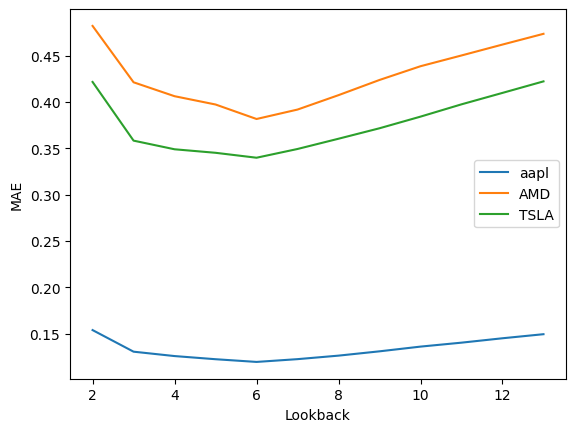

In [6]:
#Read Results CSV, find the best lookback period by finding lowest MAE
aapl_results = pd.read_csv('Results/aapl_results.csv', index_col=0)
amd_results = pd.read_csv('Results/AMD_results.csv', index_col=0)
tsla_results = pd.read_csv('Results/TSLA_results.csv', index_col=0)

#Show table with top 10 results
print(aapl_results.sort_values(by=['MAE']).head(5))
print(amd_results.sort_values(by=['MAE']).head(5))
print(tsla_results.sort_values(by=['MAE']).head(5))

#Get the best lookback period for each stock
lookbackDictionary = {}
lookbackDictionary['AAPL'] = aapl_results['lookback'][aapl_results['MAE'].idxmin()]
lookbackDictionary['AMD'] = amd_results['lookback'][amd_results['MAE'].idxmin()]
lookbackDictionary['TSLA'] = tsla_results['lookback'][tsla_results['MAE'].idxmin()]
print(lookbackDictionary)

#Plot the results
plt.plot(aapl_results['lookback'], aapl_results['MAE'], label='aapl')
plt.plot(amd_results['lookback'], amd_results['MAE'], label='AMD')
plt.plot(tsla_results['lookback'], tsla_results['MAE'], label='TSLA')
plt.xlabel('Lookback')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [10]:
stocks = {'AAPL': aapl, 'AMD': amd, 'TSLA':tsla}
for stockName, stock in stocks.items():
    X_test = stock['Date'].iloc[len(stock)-365*2:]
    y_test = stock['Close'].iloc[len(stock)-365*2:]
    lookbackCount = lookbackDictionary[stockName]

    csv_out = {'timestamp':[], 'DateTime':[], 'actual':[], 'predicted':[], 'values':[]}

    errors = []
    percentageError = []
    for startIndex in range(0,len(X_test)-lookbackCount):
        predictIndex = startIndex + lookbackCount
        LR = LinearRegression()
        intercept, gradient, x_min, x_scale, y_min, y_scale = LR.train(X_test.iloc[startIndex:predictIndex], y_test.iloc[startIndex:predictIndex])
        err = abs(y_test.iloc[predictIndex] - LR.predict(X_test.iloc[predictIndex]))
        errors.append(err)
        percentageError.append(err/y_test.iloc[predictIndex])
        csv_out['timestamp'].append(X_test.iloc[predictIndex])
        csv_out['DateTime'].append(pd.to_datetime(X_test.iloc[predictIndex]))
        csv_out['actual'].append(y_test.iloc[predictIndex])
        csv_out['predicted'].append(LR.predict(X_test.iloc[predictIndex]))
        csv_out['values'].append([gradient, intercept, x_min, x_scale, y_min, y_scale])
    #Print and store results
    print('--------------RESULTS--------------')
    print('Lookback:', lookbackCount)
    print('Mean Absolute Error:', np.mean(errors))
    pd.DataFrame(csv_out).to_csv('Results/'+stockName+'_test_results.csv')

--------------RESULTS--------------
Lookback: 6
Mean Absolute Error: 2.464090114764647
--------------RESULTS--------------
Lookback: 6
Mean Absolute Error: 2.7218788644950975
--------------RESULTS--------------
Lookback: 6
Mean Absolute Error: 7.661226340929521


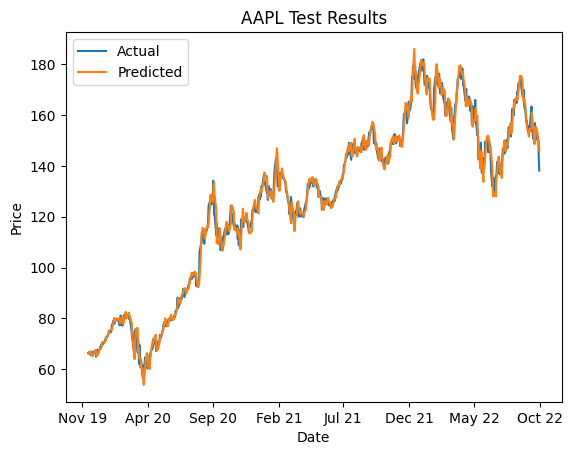

In [7]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
#Plot AAPL test results, showing actual and predicted
AAPL_test_results = pd.read_csv('Results/AAPL_test_results.csv', index_col=0)
AAPL_test_results['DateTime'] = pd.to_datetime(AAPL_test_results['DateTime'])
plt.plot(AAPL_test_results['DateTime'], AAPL_test_results['actual'], label='Actual')
plt.plot(AAPL_test_results['DateTime'], AAPL_test_results['predicted'], label='Predicted')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5)) 
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %y'))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Test Results')
plt.legend()
#save the plot
plt.savefig('Results/AAPL_test_results.png')
plt.show()

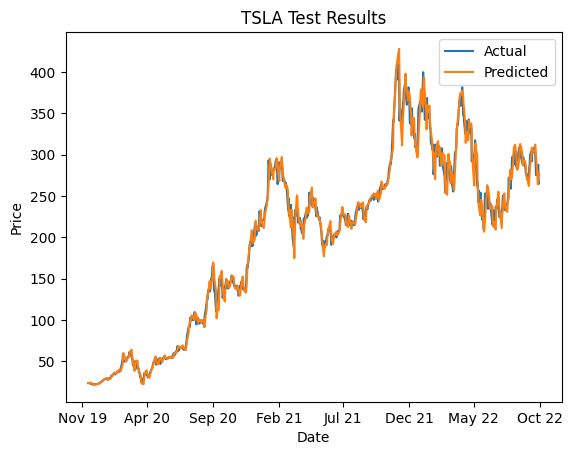

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
#Plot TSLA test results, showing actual and predicted
tsla_test_results = pd.read_csv('Results/TSLA_test_results.csv', index_col=0)
tsla_test_results['DateTime'] = pd.to_datetime(tsla_test_results['DateTime'])
plt.plot(tsla_test_results['DateTime'], tsla_test_results['actual'], label='Actual')
plt.plot(tsla_test_results['DateTime'], tsla_test_results['predicted'], label='Predicted')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %y'))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('TSLA Test Results')
#save png of plot
plt.savefig('Results/TSLA_test_results.png')
plt.show()

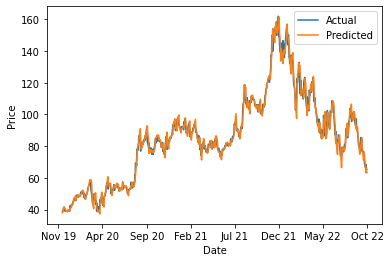

In [152]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
#Plot AMD test results, showing actual and predicted
amd_test_results = pd.read_csv('Results/AMD_test_results.csv', index_col=0)
amd_test_results['DateTime'] = pd.to_datetime(amd_test_results['DateTime'])
plt.plot(amd_test_results['DateTime'], amd_test_results['actual'], label='Actual')
plt.plot(amd_test_results['DateTime'], amd_test_results['predicted'], label='Predicted')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %y'))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Gradient: 0.8101470949955875
Intercept: -0.03097849911432493


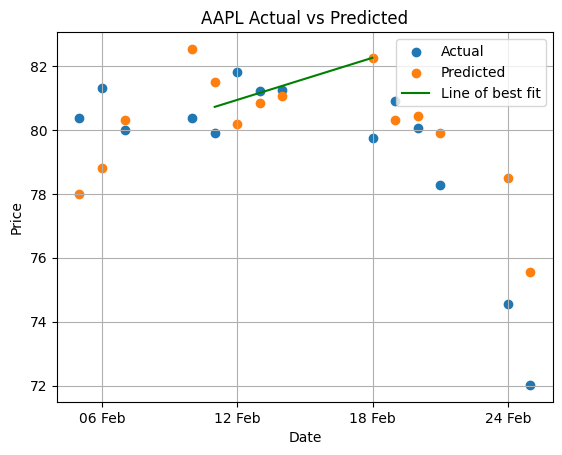

In [26]:
#Notice that at portions when the stock was plateauing, 
#the model instead predicted an upward trend, which is incorrect

#Plot AAPL actual and predicted as scatter plot
AAPL_custom = AAPL_test_results[(AAPL_test_results['DateTime'] >= '2020-02-05') & (AAPL_test_results['DateTime'] < '2020-02-26')]
plt.scatter(AAPL_custom['DateTime'], AAPL_custom['actual'], label='Actual')
plt.scatter(AAPL_custom['DateTime'], AAPL_custom['predicted'], label='Predicted')
#retrieve gradient and intercept for 21st Feb 2022
values = AAPL_test_results['values'][AAPL_test_results['DateTime'] == '2020-02-18'].iloc[0]
gradient, intercept, x_min, x_scale, y_min, y_scale = eval(values)
print('Gradient:', gradient)
print('Intercept:', intercept)
AAPL_lookback_from_18th_feb = AAPL_test_results[(AAPL_test_results['DateTime'] >= '2020-02-11') & (AAPL_test_results['DateTime'] <= '2020-02-18')]
x = (AAPL_lookback_from_18th_feb['timestamp'] - x_min) / x_scale
y = x * gradient + intercept
y = y * y_scale + y_min
plt.plot(AAPL_lookback_from_18th_feb['DateTime'], y, label='Line of best fit', color='green')


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.title('AAPL Actual vs Predicted')
#save the plot
plt.savefig('Results/AAPL_actual_vs_predicted.png')
plt.show()

essentially, y= (gradient)(y_scale)x + (y_min + (intercept)(y_scale))

In [33]:
x

58    0.571429
59    0.714286
60    0.857143
61    1.000000
62    1.571429
Name: timestamp, dtype: float64

In [34]:
1.54*(1.57)+79.8

82.2178

In [22]:
(0.8101470949955875*(1.571429)*y_scale) + y_min +( -0.03097849911432493 * y_scale)

82.25940868585266

In [11]:
#Test the model on the test data
stocks = {'AAPL': aapl, 'AMD': amd, 'TSLA':tsla}
for stockName, stock in stocks.items():
    X_test = stock['Date'].iloc[len(stock)-365*2:]
    y_test = stock['Close'].iloc[len(stock)-365*2:]
    lookbackCount = lookbackDictionary[stockName]

    csv_out = {'timestamp':[], 'DateTime':[], 'actual':[], 'predicted':[], 'values':[]}

    errors = []
    percentageError = []
    for startIndex in range(0,len(X_test)-lookbackCount):
        predictIndex = startIndex + lookbackCount
        #initialise diagonal matrix importance with each value being 1/lookbackCount-i
        importance = np.diag([1/(lookbackCount-i)**2 for i in range(lookbackCount)])
        WLR = WeightedLinearRegression()
        intercept, gradient, x_min, x_scale, y_min, y_scale = WLR.train(X_test.iloc[startIndex:predictIndex], y_test.iloc[startIndex:predictIndex], importance)
        err = abs(y_test.iloc[predictIndex] - WLR.predict(X_test.iloc[predictIndex]))
        errors.append(err)
        percentageError.append(err/y_test.iloc[predictIndex])
        csv_out['timestamp'].append(X_test.iloc[predictIndex])
        csv_out['DateTime'].append(pd.to_datetime(X_test.iloc[predictIndex]))
        csv_out['actual'].append(y_test.iloc[predictIndex])
        csv_out['predicted'].append(WLR.predict(X_test.iloc[predictIndex]))
        csv_out['values'].append([gradient, intercept, x_min, x_scale, y_min, y_scale])
    #Print and store results
    print('--------------RESULTS--------------')
    print('Lookback:', lookbackCount)
    print('Mean Absolute Error:', np.mean(errors))
    pd.DataFrame(csv_out).to_csv('Results/'+stockName+'_WEIGHTED_test_results.csv')

--------------RESULTS--------------
Lookback: 6
Mean Absolute Error: 2.2310091485460752
--------------RESULTS--------------
Lookback: 6
Mean Absolute Error: 2.4982656249339135
--------------RESULTS--------------
Lookback: 6
Mean Absolute Error: 6.749398980365186


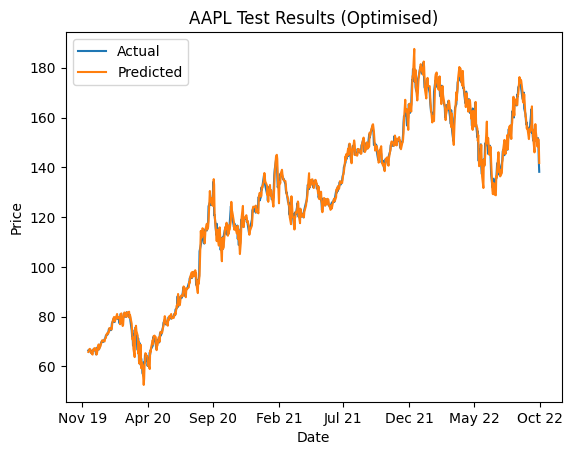

In [7]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
#Plot AAPL test results, showing actual and predicted, for weighted linear regression
AAPL_test_results = pd.read_csv('Results/AAPL_WEIGHTED_test_results.csv', index_col=0)
AAPL_test_results['DateTime'] = pd.to_datetime(AAPL_test_results['DateTime'])
plt.plot(AAPL_test_results['DateTime'], AAPL_test_results['actual'], label='Actual')
plt.plot(AAPL_test_results['DateTime'], AAPL_test_results['predicted'], label='Predicted')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %y'))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('AAPL Test Results (Optimised)')
# save the plot
plt.savefig('Results/AAPL_test_results_weighted.png')
plt.show()


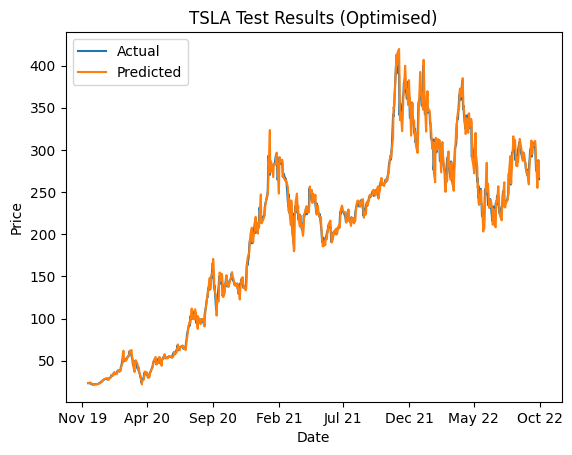

In [8]:
#get tesla test results optimised graph
TSLA_test_results = pd.read_csv('Results/TSLA_WEIGHTED_test_results.csv', index_col=0)
TSLA_test_results['DateTime'] = pd.to_datetime(TSLA_test_results['DateTime'])
plt.plot(TSLA_test_results['DateTime'], TSLA_test_results['actual'], label='Actual')
plt.plot(TSLA_test_results['DateTime'], TSLA_test_results['predicted'], label='Predicted')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %y'))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('TSLA Test Results (Optimised)')
# save the plot
plt.savefig('Results/TSLA_test_results_weighted.png')
plt.show()


0.6341197167777364


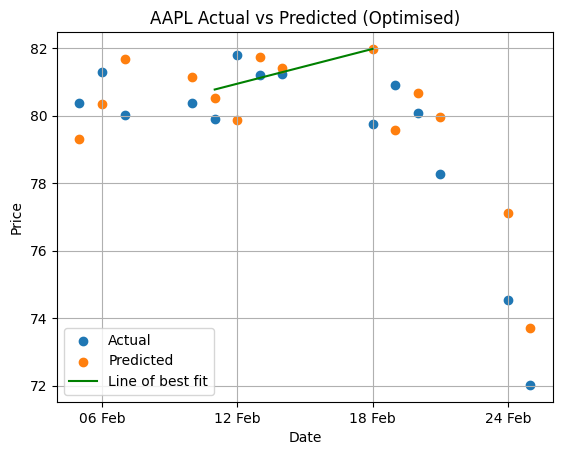

In [9]:
#Notice that at portions when the stock was plateauing, 
#the model instead predicted an upward trend, which is incorrect

#Plot AAPL actual and predicted as scatter plot
AAPL_custom = AAPL_test_results[(AAPL_test_results['DateTime'] >= '2020-02-05') & (AAPL_test_results['DateTime'] < '2020-02-26')]
plt.scatter(AAPL_custom['DateTime'], AAPL_custom['actual'], label='Actual')
plt.scatter(AAPL_custom['DateTime'], AAPL_custom['predicted'], label='Predicted')
#retrieve gradient and intercept for 21st Feb 2022
values = AAPL_test_results['values'][AAPL_test_results['DateTime'] == '2020-02-18'].iloc[0]
gradient, intercept, x_min, x_scale, y_min, y_scale = eval(values)
AAPL_lookback_from_18th_feb = AAPL_test_results[(AAPL_test_results['DateTime'] >= '2020-02-11') & (AAPL_test_results['DateTime'] <= '2020-02-18')]
x = (AAPL_lookback_from_18th_feb['timestamp'] - x_min) / x_scale
print(gradient)
y = x * gradient + intercept
y = y * y_scale + y_min
plt.plot(AAPL_lookback_from_18th_feb['DateTime'], y, label='Line of best fit', color='green')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.title('AAPL Actual vs Predicted (Optimised)')
#save the plot
plt.savefig('Results/AAPL_actual_vs_predicted_weighted.png')

plt.show()

In [10]:
print(gradient)
print(intercept)

0.6341197167777364
0.09778633203498793


In [11]:
(0.6341197167777364*(1.571429)*y_scale) + y_min +(0.09778633203498793 * y_scale)

81.97886285316947

In [12]:
0.6341197167777364*(1.571429)

0.9964741124163214

In [13]:
y_min +(0.09778633203498793 * y_scale)

80.08804624954071

In [15]:
(0.996)*(1.571429) + 80.1

81.665143284

### Profits

--------------Control RESULTS--------------
Stock: AAPL
Profit: 63.29733668068208


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\3332634247.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), profitTime, label='Profit over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\3332634247.py:27: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\3332634247.py:27: 

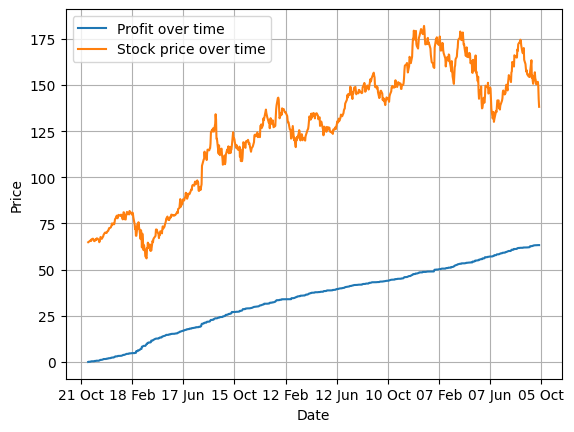

--------------Control RESULTS--------------
Stock: AMD
Profit: 97.06007141715187


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\3332634247.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), profitTime, label='Profit over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\3332634247.py:27: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\3332634247.py:27: 

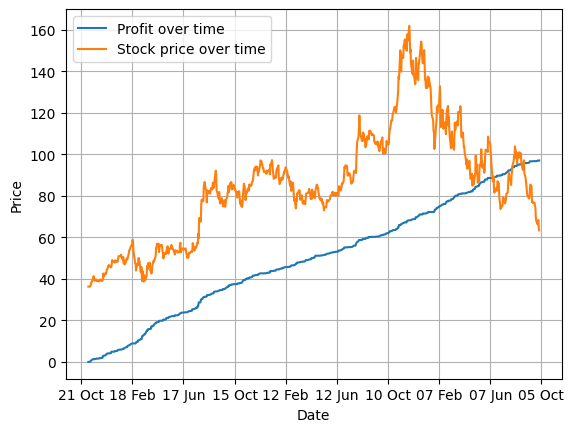

C:\Users\sean\AppData\Local\Temp\ipykernel_20364\3332634247.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), profitTime, label='Profit over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\3332634247.py:27: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\3332634247.py:27: 

--------------Control RESULTS--------------
Stock: TSLA
Profit: 131.1913558949538


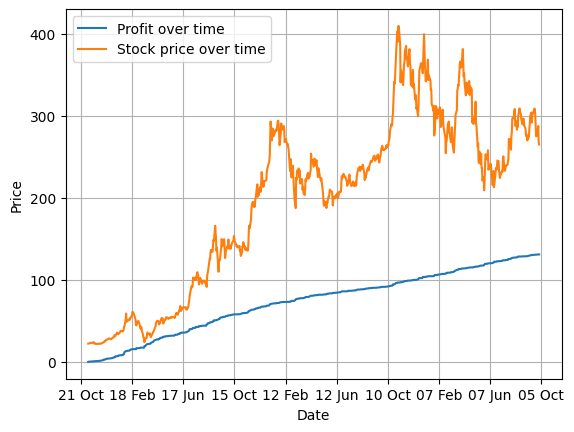

In [13]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
stocks = {'AAPL': aapl, 'AMD': amd, 'TSLA':tsla}
for stockName, stock in stocks.items():
    lookbackCount = lookbackDictionary[stockName]
    X_test = stock['Date'].iloc[len(stock)-365*2-lookbackCount:]
    y_test = stock['Close'].iloc[len(stock)-365*2-lookbackCount:]

    profit = 0
    profitTime = []
    for day in range(lookbackCount,len(X_test)-1):
        #everyday, we are given $10 to invest
        #if the stock price increases tomorrow, we buy $10 worth of stock and sell it the next day
        if y_test.iloc[day+1] > y_test.iloc[day]:
            stockCount = 10/y_test.iloc[day]
            profit += stockCount * y_test.iloc[day+1] - 10
        #if not, we do nothing, holding onto the $10, making no profit/loss
        profitTime.append(profit)
    #append the final profit to the list
    profitTime.append(profit)
    print('--------------Control RESULTS--------------')
    print('Stock:', stockName)
    print('Profit:', profit)
    
    #plot profit over time, and stock price over time, converting the timestamp to a datetime object
    plt.plot(pd.to_datetime(X_test[lookbackCount:]), profitTime, label='Profit over time')
    plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()


--------------Control Weekly RESULTS--------------
Stock: AAPL
Profit: 246.63285511689458


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1798712839.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1798712839.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


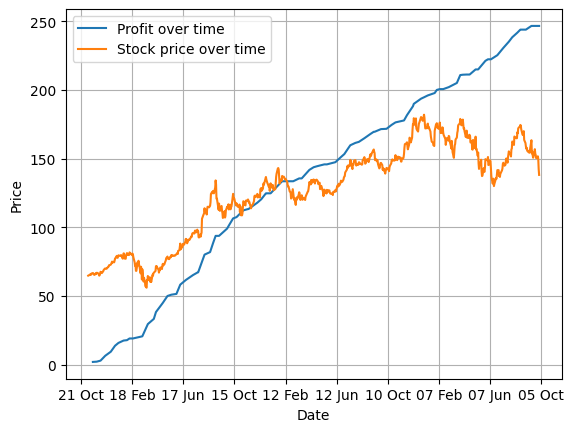

--------------Control Weekly RESULTS--------------
Stock: AMD
Profit: 414.76173808051806


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1798712839.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1798712839.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


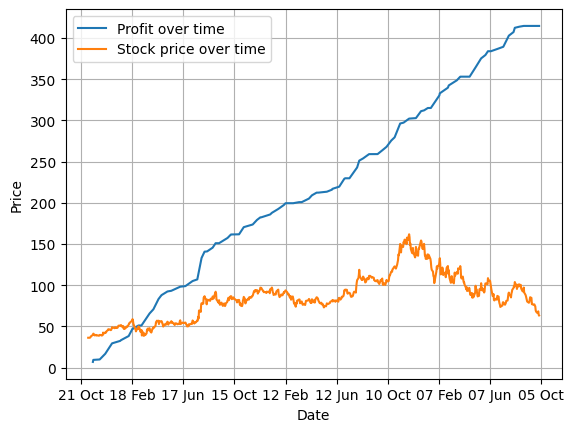

C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1798712839.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1798712839.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


--------------Control Weekly RESULTS--------------
Stock: TSLA
Profit: 575.0444542046819


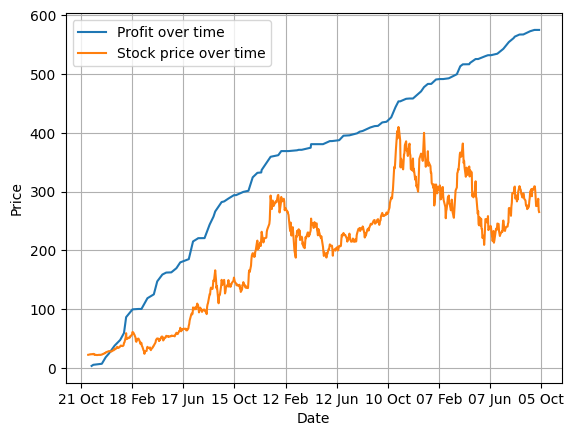

In [14]:
stocks = {'AAPL': aapl, 'AMD': amd, 'TSLA':tsla}
for stockName, stock in stocks.items():
    lookbackCount = lookbackDictionary[stockName]
    X_test = stock['Date'].iloc[len(stock)-365*2-lookbackCount:]
    y_test = stock['Close'].iloc[len(stock)-365*2-lookbackCount:]

    profit = 0
    profitTimeDict = {}
    for day in range(lookbackCount,len(X_test)-1,7):
        #every month, we are given $10*7 to invest
        #we buy $70 worth of stock on the first day
        stockCount = 70/y_test.iloc[day]
        #find the day 30 days later where the stock price is highest
        maxPrice = max(y_test.iloc[day:day+7+1])
        maxPriceIndex = y_test.iloc[day:day+7+1].tolist().index(maxPrice)
        #sell the stock on that day
        profit += stockCount * maxPrice - 70
        profitTimeDict[X_test.iloc[day+maxPriceIndex]] = profit
                
    #append the final profit to the list
    profitTimeDict[X_test.iloc[len(X_test)-1]] = profit
    print('--------------Control Weekly RESULTS--------------')
    print('Stock:', stockName)
    print('Profit:', profit)
    
    #plot profit over time, and stock price over time, converting the timestamp to a datetime object
    plt.plot(pd.to_datetime(list(profitTimeDict.keys())), list(profitTimeDict.values()), label='Profit over time')
    plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()


--------------Control Monthly RESULTS--------------
Stock: AAPL
Profit: 779.0104087119162


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1053671715.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1053671715.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


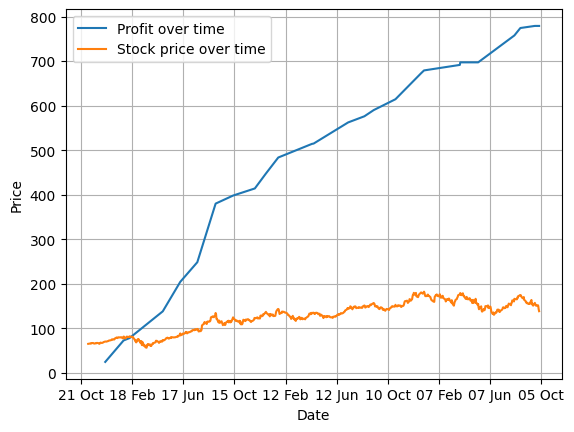

--------------Control Monthly RESULTS--------------
Stock: AMD
Profit: 1179.6024727907989


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1053671715.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1053671715.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


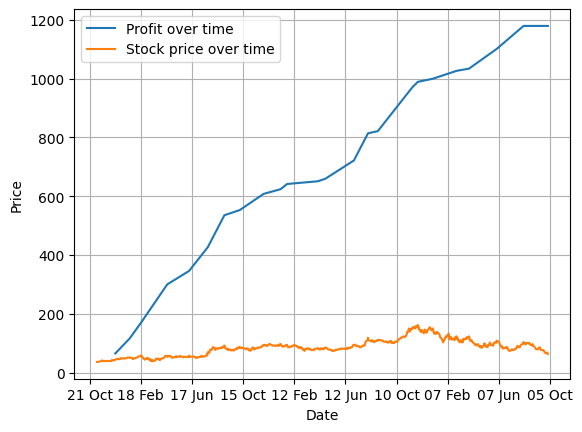

--------------Control Monthly RESULTS--------------
Stock: TSLA
Profit: 2236.15390395905


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1053671715.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\1053671715.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


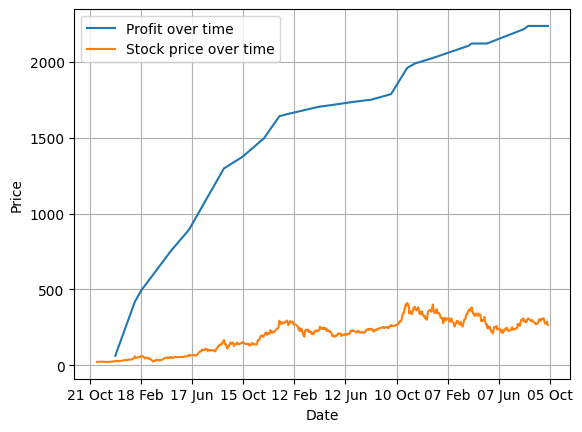

In [15]:
stocks = {'AAPL': aapl, 'AMD': amd, 'TSLA':tsla}
for stockName, stock in stocks.items():
    lookbackCount = lookbackDictionary[stockName]
    X_test = stock['Date'].iloc[len(stock)-365*2-lookbackCount:]
    y_test = stock['Close'].iloc[len(stock)-365*2-lookbackCount:]

    profit = 0
    profitTimeDict = {}
    for day in range(lookbackCount,len(X_test)-1,30):
        #every month, we are given $10*30 to invest
        #we buy $300 worth of stock on the first day
        stockCount = 300/y_test.iloc[day]
        #find the day 30 days later where the stock price is highest
        maxPrice = max(y_test.iloc[day:day+30+1])
        maxPriceIndex = y_test.iloc[day:day+30+1].tolist().index(maxPrice)
        #sell the stock on that day
        profit += stockCount * maxPrice - 300
        profitTimeDict[X_test.iloc[day+maxPriceIndex]] = profit
                
    #append the final profit to the list
    profitTimeDict[X_test.iloc[len(X_test)-1]] = profit
    print('--------------Control Monthly RESULTS--------------')
    print('Stock:', stockName)
    print('Profit:', profit)
    
    #plot profit over time, and stock price over time, converting the timestamp to a datetime object
    plt.plot(pd.to_datetime(list(profitTimeDict.keys())), list(profitTimeDict.values()), label='Profit over time')
    plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()


--------------LR Weekly RESULTS--------------
Stock: AAPL
Profit: 46.00438769543094
Wrong Trades: 44/104


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\2808023756.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\2808023756.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


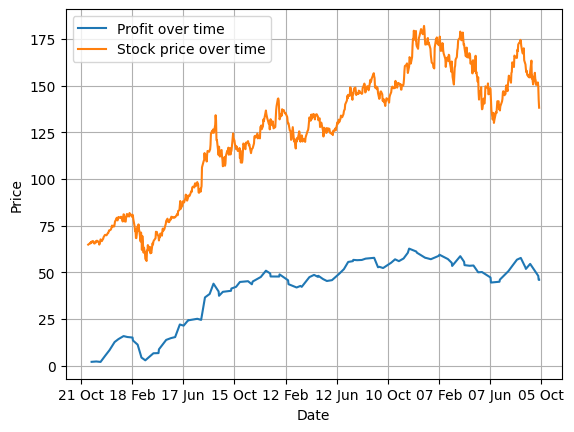

--------------LR Weekly RESULTS--------------
Stock: AMD
Profit: 48.9686533816751
Wrong Trades: 55/104


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\2808023756.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\2808023756.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


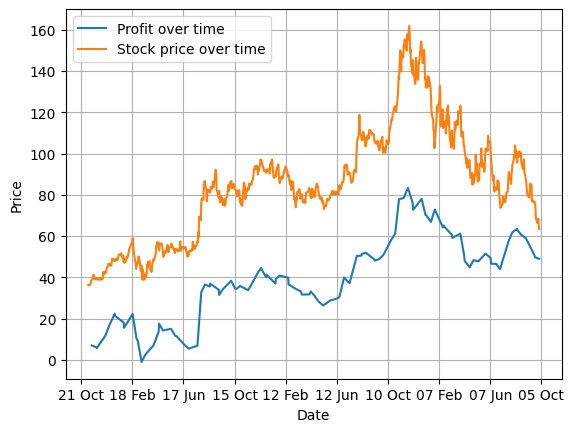

--------------LR Weekly RESULTS--------------
Stock: TSLA
Profit: 150.15688605319377
Wrong Trades: 48/104


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\2808023756.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\2808023756.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


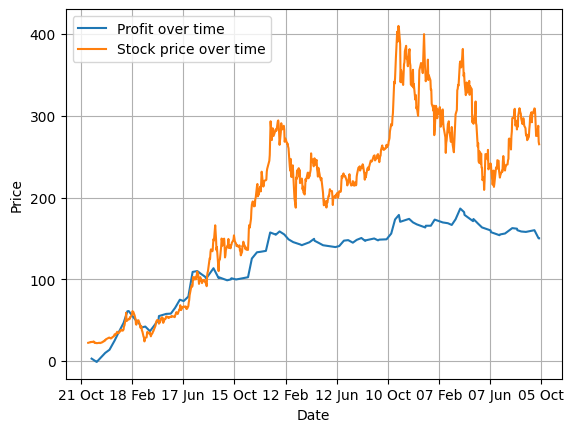

In [18]:
stocks = {'AAPL': aapl, 'AMD': amd, 'TSLA':tsla}
for stockName, stock in stocks.items():
    lookbackCount = lookbackDictionary[stockName]
    X_test = stock['Date'].iloc[len(stock)-365*2-lookbackCount:]
    y_test = stock['Close'].iloc[len(stock)-365*2-lookbackCount:]

    profit = 0
    wrongTrade = 0
    profitTimeDict = {}
    for day in range(lookbackCount,len(X_test)-1,7):
        #every month, we are given $10*7 to invest
        #we buy $70 worth of stock on the first day
        stockCount = 70/y_test.iloc[day]
        #Note, we sell on the actual price, not the predicted price
        LR = LinearRegression()
        #we train on the past lookback days including today
        LR.train(X_test.iloc[day-(lookbackCount-1):day+1], y_test.iloc[day-(lookbackCount-1):day+1])
        #predict the stock price for the next 7 days
        predictions = []
        for i in range(7):
            try:
                predictions.append(LR.predict(X_test.iloc[day+1+i]))
            except:
                predictions.append(0)
        #sell the stock on the day where the stock price is highest, using the original stock price
        maxPrice = max(predictions)
        maxPriceIndex = predictions.index(maxPrice)
        profit += stockCount * y_test.iloc[day+1+maxPriceIndex] - 70
        #calculate wrong trade if sold at a price lower than bought
        if y_test.iloc[day+1+maxPriceIndex] < y_test.iloc[day]:
            wrongTrade += 1

        profitTimeDict[X_test.iloc[day+maxPriceIndex]] = profit
    #append the final profit to the list
    profitTimeDict[X_test.iloc[len(X_test)-1]] = profit

    print('--------------LR Weekly RESULTS--------------')
    print('Stock:', stockName)
    print('Profit:', profit)
    print(f'Wrong Trades: {wrongTrade}/{ (len(X_test)-lookbackCount) // 7}')
    #plot profit over time, and stock price over time, converting the timestamp to a datetime object
    plt.plot(pd.to_datetime(list(profitTimeDict.keys())), list(profitTimeDict.values()), label='Profit over time')
    plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()


--------------LR Monthly RESULTS--------------
Stock: AAPL
Profit: 201.24664438709073
Wrong Trades: 10/24


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\904657013.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\904657013.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


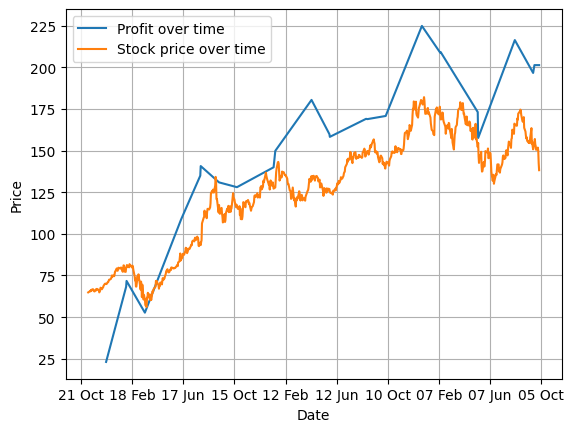

--------------LR Monthly RESULTS--------------
Stock: AMD
Profit: -107.0152404794319
Wrong Trades: 16/24


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\904657013.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\904657013.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


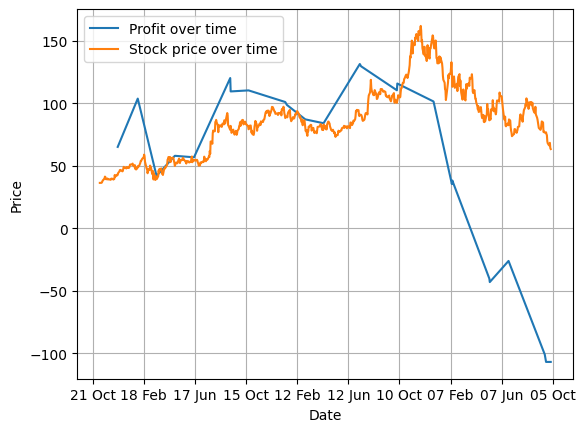

--------------LR Monthly RESULTS--------------
Stock: TSLA
Profit: 533.3951818796993
Wrong Trades: 9/24


C:\Users\sean\AppData\Local\Temp\ipykernel_20364\904657013.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\sean\AppData\Local\Temp\ipykernel_20364\904657013.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


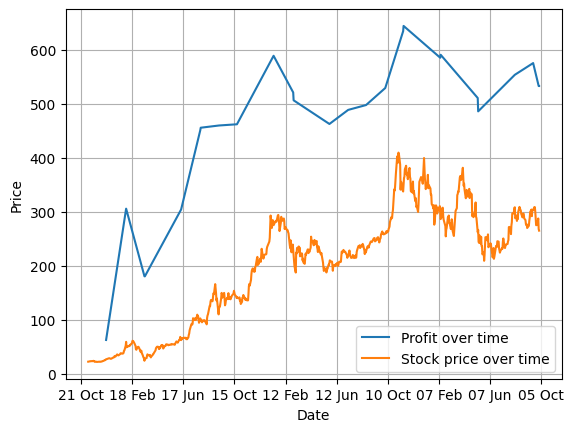

In [19]:
stocks = {'AAPL': aapl, 'AMD': amd, 'TSLA':tsla}
for stockName, stock in stocks.items():
    lookbackCount = lookbackDictionary[stockName]
    X_test = stock['Date'].iloc[len(stock)-365*2-lookbackCount:]
    y_test = stock['Close'].iloc[len(stock)-365*2-lookbackCount:]

    profit = 0
    wrongTrade = 0
    profitTimeDict = {}
    for day in range(lookbackCount,len(X_test)-1,30):
        #every month, we are given $10*30 to invest
        #we buy $300 worth of stock on the first day
        stockCount = 300/y_test.iloc[day]
        #Note, we sell on the actual price, not the predicted price
        LR = LinearRegression()
        #we train on the past lookback days including today
        LR.train(X_test.iloc[day-(lookbackCount-1):day+1], y_test.iloc[day-(lookbackCount-1):day+1])
        #predict the stock price for the next 30 days
        predictions = []
        for i in range(30):
            try:
                predictions.append(LR.predict(X_test.iloc[day+1+i]))
            except:
                predictions.append(0)
        #sell the stock on the day where the stock price is highest, using the original stock price
        maxPrice = max(predictions)
        maxPriceIndex = predictions.index(maxPrice)
        profit += stockCount * y_test.iloc[day+1+maxPriceIndex] - 300
        #calculate wrong trade if sold at a price lower than bought
        if y_test.iloc[day+1+maxPriceIndex] < y_test.iloc[day]:
            wrongTrade += 1

        profitTimeDict[X_test.iloc[day+maxPriceIndex]] = profit
    #append the final profit to the list
    profitTimeDict[X_test.iloc[len(X_test)-1]] = profit

    print('--------------LR Monthly RESULTS--------------')
    print('Stock:', stockName)
    print('Profit:', profit)
    print(f'Wrong Trades: {wrongTrade}/{(len(X_test)-lookbackCount) // 30}')
    #plot profit over time, and stock price over time, converting the timestamp to a datetime object
    plt.plot(pd.to_datetime(list(profitTimeDict.keys())), list(profitTimeDict.values()), label='Profit over time')
    plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()


--------------WLR Weekly RESULTS--------------
Stock: AAPL
Profit: 64.44098857331853
Wrong Trades: 43/104


C:\Users\seans\AppData\Local\Temp\ipykernel_2912\3213900897.py:44: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\seans\AppData\Local\Temp\ipykernel_2912\3213900897.py:44: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


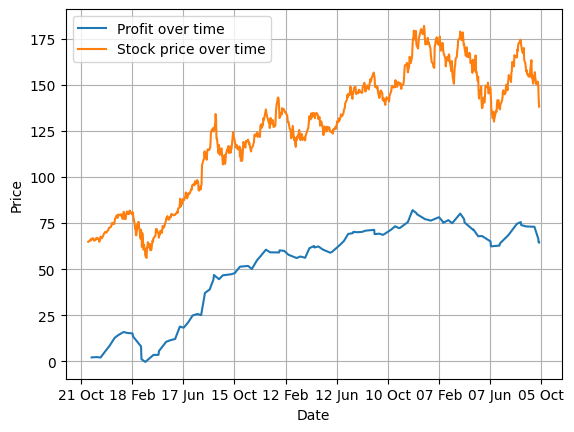

--------------WLR Weekly RESULTS--------------
Stock: AMD
Profit: 16.576841793356785
Wrong Trades: 53/104


C:\Users\seans\AppData\Local\Temp\ipykernel_2912\3213900897.py:44: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\seans\AppData\Local\Temp\ipykernel_2912\3213900897.py:44: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


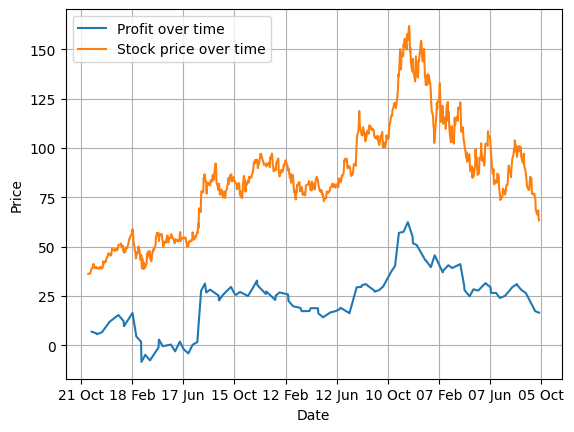

C:\Users\seans\AppData\Local\Temp\ipykernel_2912\3213900897.py:44: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
C:\Users\seans\AppData\Local\Temp\ipykernel_2912\3213900897.py:44: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')


--------------WLR Weekly RESULTS--------------
Stock: TSLA
Profit: 151.98513992829493
Wrong Trades: 47/104


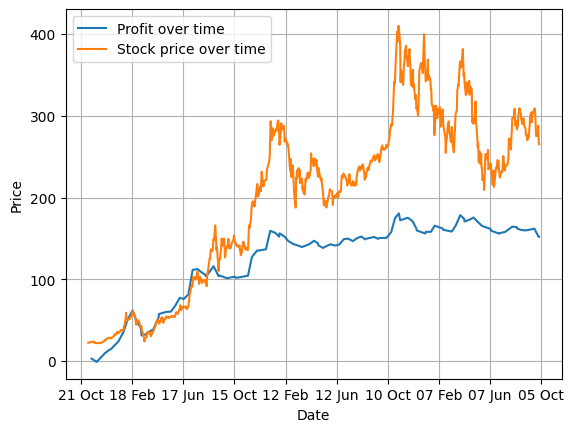

In [20]:
stocks = {'AAPL': aapl, 'AMD': amd, 'TSLA':tsla}
for stockName, stock in stocks.items():
    lookbackCount = lookbackDictionary[stockName]
    X_test = stock['Date'].iloc[len(stock)-365*2-lookbackCount:]
    y_test = stock['Close'].iloc[len(stock)-365*2-lookbackCount:]

    profit = 0
    wrongTrade = 0
    profitTimeDict = {}
    for day in range(lookbackCount,len(X_test)-1,7):
        #every month, we are given $10*7 to invest
        #we buy $70 worth of stock on the first day
        stockCount = 70/y_test.iloc[day]
        #Note, we sell on the actual price, not the predicted price
        WLR = WeightedLinearRegression()
        #we train on the past lookback days including today
        importance = np.diag([1/(lookbackCount-i)**2 for i in range(lookbackCount)])
        WLR.train(X_test.iloc[day-(lookbackCount-1):day+1], y_test.iloc[day-(lookbackCount-1):day+1], importance)
        #predict the stock price for the next 7 days
        predictions = []
        for i in range(7):
            try:
                predictions.append(WLR.predict(X_test.iloc[day+1+i]))
            except:
                predictions.append(0)
        #sell the stock on the day where the stock price is highest, using the original stock price
        maxPrice = max(predictions)
        maxPriceIndex = predictions.index(maxPrice)
        profit += stockCount * y_test.iloc[day+1+maxPriceIndex] - 70
        #calculate wrong trade if sold at a price lower than bought
        if y_test.iloc[day+1+maxPriceIndex] < y_test.iloc[day]:
            wrongTrade += 1

        profitTimeDict[X_test.iloc[day+maxPriceIndex]] = profit
    #append the final profit to the list
    profitTimeDict[X_test.iloc[len(X_test)-1]] = profit

    print('--------------WLR Weekly RESULTS--------------')
    print('Stock:', stockName)
    print('Profit:', profit)
    print(f'Wrong Trades: {wrongTrade}/{(len(X_test)-lookbackCount) // 7}')
    #plot profit over time, and stock price over time, converting the timestamp to a datetime object
    plt.plot(pd.to_datetime(list(profitTimeDict.keys())), list(profitTimeDict.values()), label='Profit over time')
    plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price over time')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()


In [18]:
stocks = {'AAPL': aapl, 'AMD': amd, 'TSLA':tsla}
for stockName, stock in stocks.items():
    lookbackCount = lookbackDictionary[stockName]
    X_test = stock['Date'].iloc[len(stock)-365*2-lookbackCount:]
    y_test = stock['Close'].iloc[len(stock)-365*2-lookbackCount:]

    profit = 0
    wrongTrade = 0
    profitTimeDict = {}
    predictions = []
    for day in range(lookbackCount,len(X_test)-1,30):
        #every month, we are given $10*30 to invest
        #we buy $300 worth of stock on the first day
        stockCount = 300/y_test.iloc[day]
        #Note, we sell on the actual price, not the predicted price
        WLR = WeightedLinearRegression()
        #we train on the past lookback days including today
        importance = np.diag([1/(lookbackCount-i)**2 for i in range(lookbackCount)])
        WLR.train(X_test.iloc[day-(lookbackCount-1):day+1], y_test.iloc[day-(lookbackCount-1):day+1], importance)
        #predict the stock price for the next 7 days
        tmp_predictions = []
        for i in range(30):
            try:
                predictions.append(WLR.predict(X_test.iloc[day+1+i]))
                tmp_predictions.append(WLR.predict(X_test.iloc[day+1+i]))
            except:
                predictions.append(0)
                tmp_predictions.append(0)
        #sell the stock on the day where the stock price is highest, using the original stock price
        maxPrice = max(tmp_predictions)
        maxPriceIndex = tmp_predictions.index(maxPrice)
        profit += stockCount * y_test.iloc[day+1+maxPriceIndex] - 300
        #calculate wrong trade if sold at a price lower than bought
        if y_test.iloc[day+1+maxPriceIndex] < y_test.iloc[day]:
            wrongTrade += 1

        profitTimeDict[X_test.iloc[day+maxPriceIndex]] = profit
    #append the final profit to the list
    profitTimeDict[X_test.iloc[len(X_test)-1]] = profit

    print('--------------WLR Monthly RESULTS--------------')
    print('Stock:', stockName)
    print('Profit:', profit)
    print(f'Wrong Trades: {wrongTrade}/{(len(X_test)-lookbackCount) // 30}')
    #plot predicted price over time, and stock price over time, converting the timestamp to a datetime object
    plt.plot(pd.to_datetime(X_test[lookbackCount:]), predictions, label='Predicted price')
    plt.plot(pd.to_datetime(X_test[lookbackCount:]), y_test[lookbackCount:], label='Stock price')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    

IndexError: single positional indexer is out-of-bounds